In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class1 = "/content/drive/MyDrive/Colab Notebooks/A.csv"
class2 = "/content/drive/MyDrive/Colab Notebooks/B.csv"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from csv import reader
import pandas as pd

# open file in read mode

def readData(path):
    data = []
    with open(path, 'r') as read_obj:
    # pass the file object to reader() to get the reader object
        csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            if "#" not in str(row):
            #print(row)
                data.append(row)
    return data 


def plot(data):
    df = pd.DataFrame(data=data, index=None, columns=None)
    df=df.astype(float)
    df.plot.line()


            

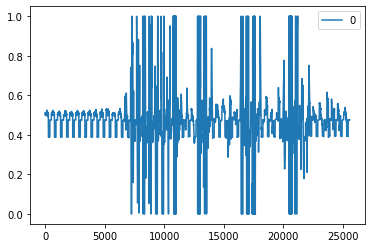

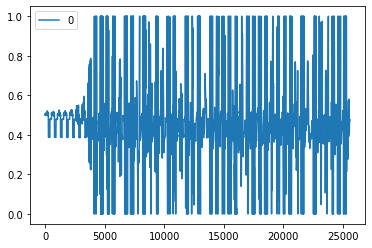

In [ ]:
data = readData(class1)
plot(data)
data2 = readData(class2)
plot(data2)


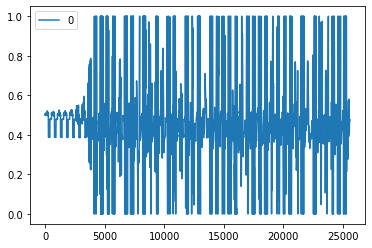

In [ ]:
data2 = readData(class2)
plot(data2)

In [ ]:
def seed(size,val):
  seed_data = []
  for x in range(size):
    seed_data.append(val)
  return seed_data

In [ ]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
from pandas import read_csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
from keras.utils import to_categorical

%matplotlib inline


from sklearn.model_selection import train_test_split

window_size = 1024
data_points = 25


c1 = np.reshape(data, (data_points,window_size))
#print(c1.shape)
c1_y = seed(data_points,0)
c2 = np.reshape(data2, (data_points, window_size))
c2_y = seed(data_points,1)
#print(c1.shape)

df_features = np.concatenate((c1, c2), axis=0)

print(df_features.shape)
y = np.concatenate((c1_y, c2_y), axis=0)
print(y.shape)

df_features = df_features.astype(float)
num_classes = 2
ylab = y
le = LabelEncoder()
le.fit(ylab)
y = le.transform(ylab)

one_hot_label = to_categorical(y)



x = df_features.reshape(df_features.shape[0], df_features.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(x, one_hot_label, test_size=0.2)

X_train.shape


(50, 1024)
(50,)


(40, 1024, 1)

In [ ]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical



# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
  model = Sequential()
  model.add(Conv1D(16, 2, activation="relu", input_shape=(trainX.shape[1], 1)))
  model.add(Conv1D(8, 2, activation="relu"))
  model.add(Flatten())
  model.add(Dense(2))
  model.add(Activation('softmax')) 
  model.summary()

  opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

  stop_early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=0, verbose=1 )
# patience = n n=number of epochs without any improvements

  history=model.fit(X_train, y_train,
            epochs=50,
            validation_split=0.15,
            callbacks=[stop_early],
            shuffle=True) 
  scores = model.evaluate(X_test, y_test, verbose=1)
  print('Test loss: %.2f' %scores[0])
  print('Test accuracy: %0.2f' %scores[1])
  return history

In [ ]:
print(X_train.shape)

#history = evaluate_model(X_train,y_train,X_test,y_test)

(40, 1024, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 1023, 16)          48        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1022, 8)           264       
_________________________________________________________________
flatten_2 (Flatten)          (None, 8176)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 16354     
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 16,666
Trainable params: 16,666
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 1s 257ms/step - loss: 0.7047 - accuracy: 0.3603 - va

In [ ]:
def plot_train_and_val(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

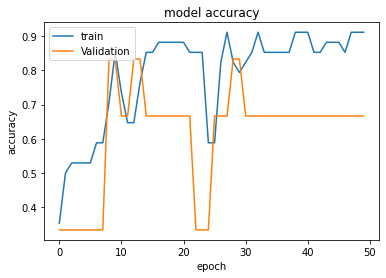

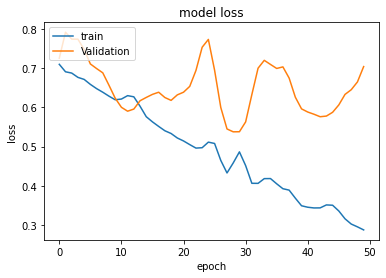

In [ ]:
plot_train_and_val(history)


In [ ]:
import pandas as pd

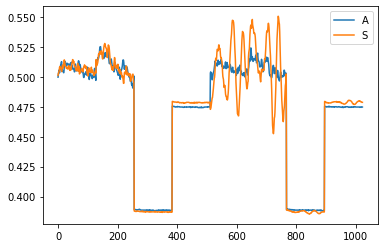

In [ ]:
df = pd.DataFrame(data=df_features, index=None, columns=None)
df

data = {'A': df.iloc[0],
        'S': df.iloc[27]
       }
df1 = pd.DataFrame(data,columns=['A','S'])

df1=df1.astype(float)


lines = df1.plot.line()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)
y_data = df.iloc[27]

## fourier transform
f1 = np.fft.fft(y_data)
## sample frequencies
freq1 = np.fft.fftfreq(len(y_data))


y2_data = df.iloc[3]
## fourier transform
f2 = np.fft.fft(y2_data)
## sample frequencies
freq2 = np.fft.fftfreq(len(y2_data))



plt.plot(freq, abs(f) ** 2)
plt.show()

print( "Shape of singal array : {}".format(x.shape))

print( "Shape of frequency array : {}".format(freq.shape))

#new_2D_array = np.vstack((x, freq)).T
#print(new_2D_array)

NameError: ignored

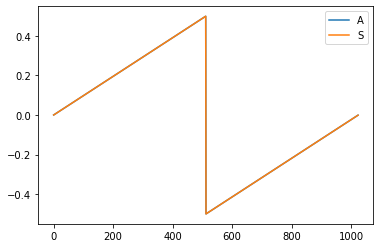

In [ ]:
data = {'A': freq2,
        'S': freq1
       }
df1 = pd.DataFrame(data,columns=['A','S'])

df1=df1.astype(float)


lines = df1.plot.line()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()

B = np.reshape(A, (-1, 2))


uniform_data = np.asarray(df.iloc[0])
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

IndexError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plotHeatmap(data):
  vec1 = data
  fig, ax = plt.subplots()
  sns.heatmap([vec1])

In [ ]:
plotHeatmap(df.iloc[0])
plotHeatmap(df.iloc[1])
plotHeatmap(df.iloc[2])


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plotHeatMap(data):

  x = data
  y = np.sin(2 * np.pi * x)

## fourier transform
  f = np.fft.fft(y)
## sample frequencies
  freq = np.fft.fftfreq(len(y))
  plt.plot(freq, abs(f) ** 2)
  plt.show()

  print( "Shape of singal array : {}".format(x.shape))

  print( "Shape of frequency array : {}".format(freq.shape))

  new_2D_array = np.vstack((x, freq)).T
  print(new_2D_array)
  return new_2D_array



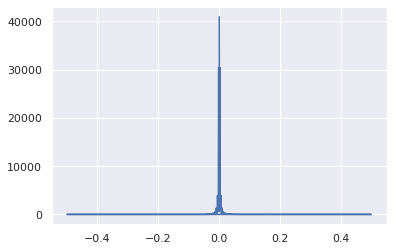

Shape of singal array : (1024,)
Shape of frequency array : (1024,)
[[ 0.54065937  0.        ]
 [ 0.54090357  0.00097656]
 [ 0.5460318   0.00195312]
 ...
 [ 0.4754579  -0.00292969]
 [ 0.4754579  -0.00195312]
 [ 0.4754579  -0.00097656]]


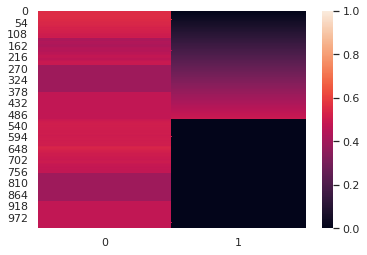

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()
uniform_data = plotHeatMap(df.iloc[24])
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

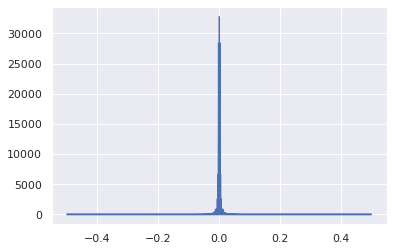

Shape of singal array : (1024,)
Shape of frequency array : (1024,)
[[ 0.49963373  0.        ]
 [ 0.50158733  0.00097656]
 [ 0.50402933  0.00195312]
 ...
 [ 0.4747253  -0.00292969]
 [ 0.4747253  -0.00195312]
 [ 0.4747253  -0.00097656]]


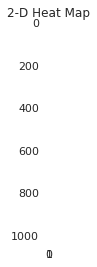

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
data = plotHeatMap(df.iloc[0])
plt.imshow( data , cmap = 'autumn' , interpolation = 'nearest' )
  
plt.title( "2d Distribution" )
plt.show()

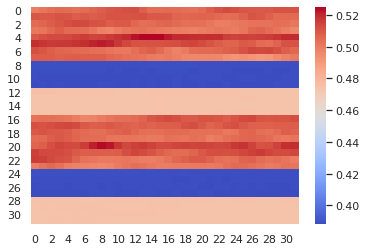

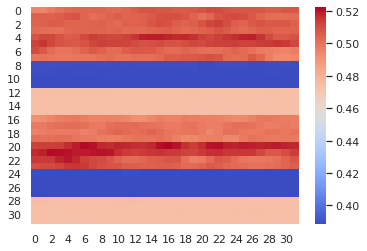

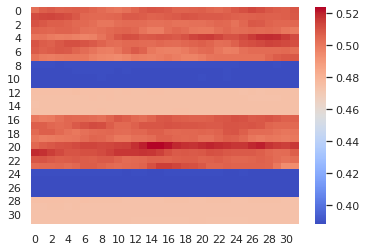

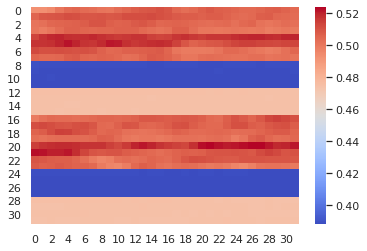

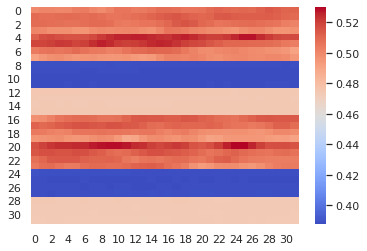

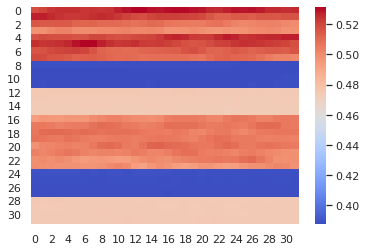

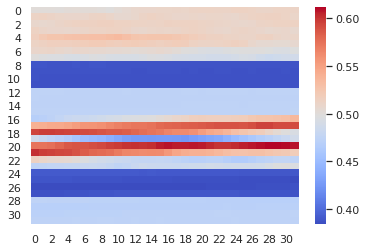

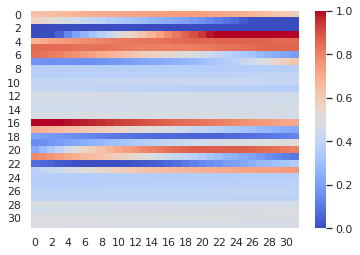

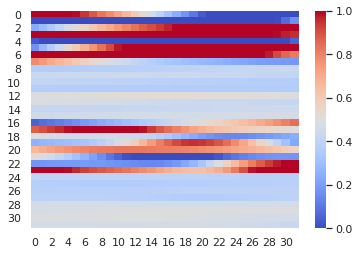

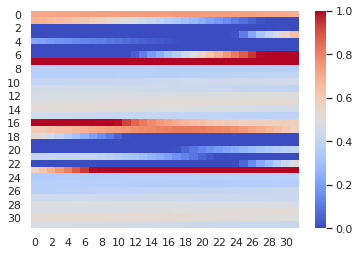

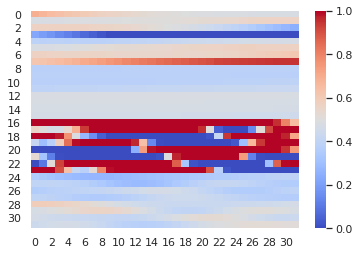

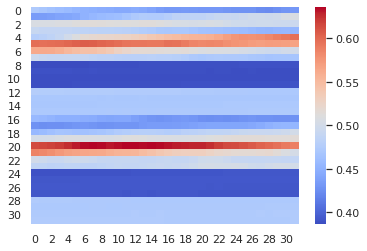

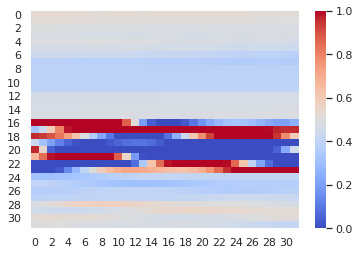

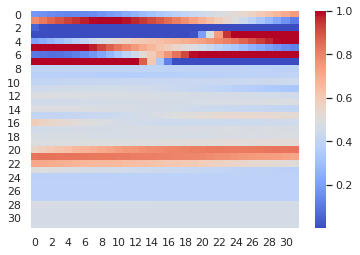

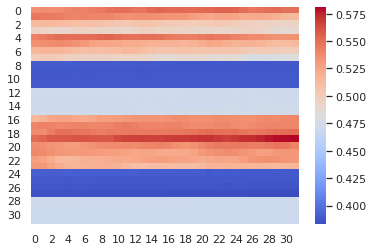

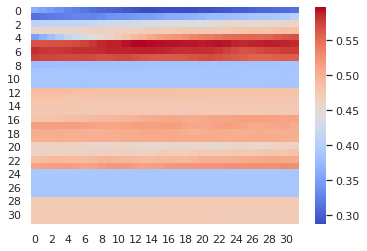

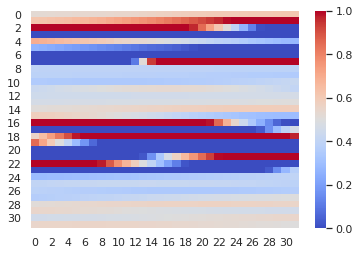

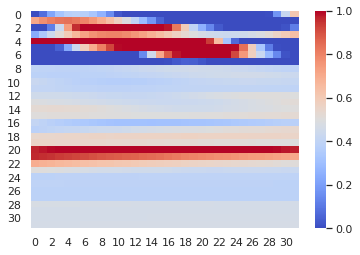

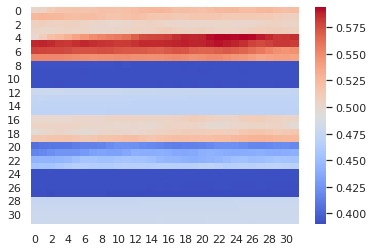

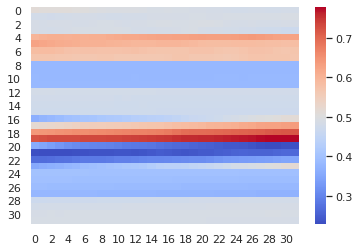

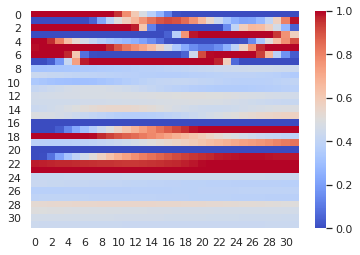

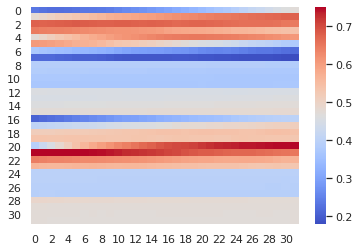

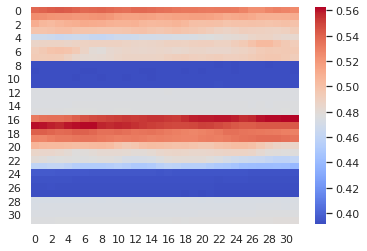

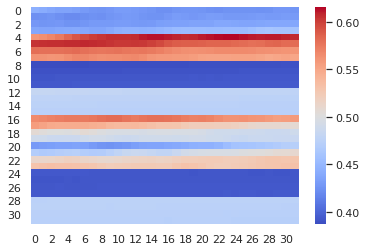

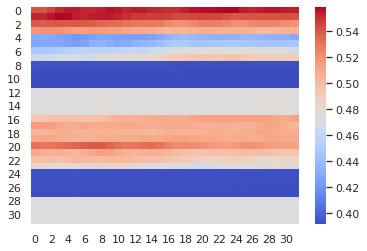

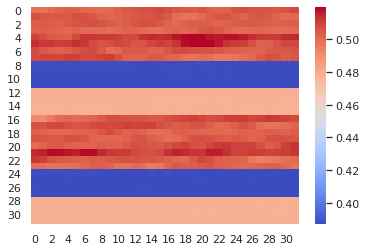

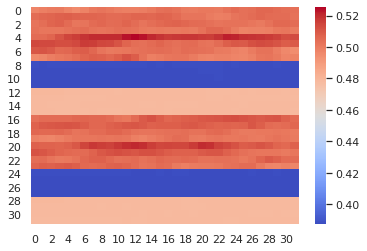

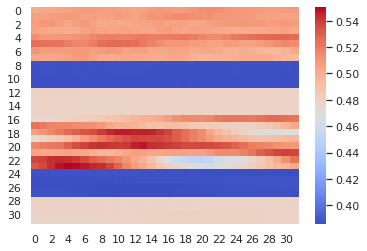

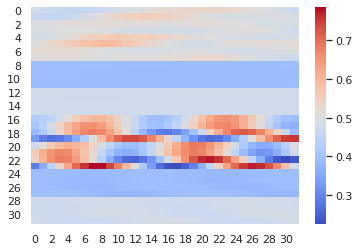

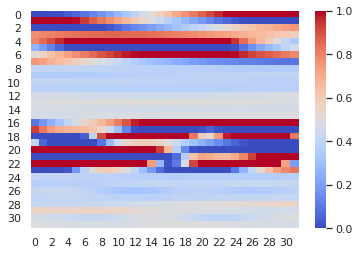

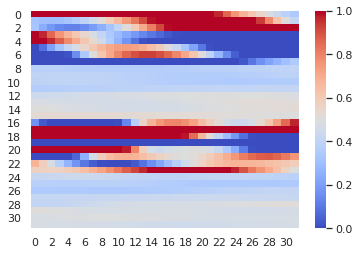

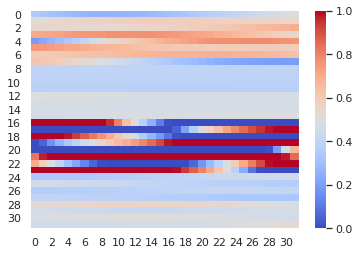

array([[0.34871796, 0.33137974, 0.31623933, ..., 0.4717949 , 0.48595852,
        0.49938953],
       [0.51037854, 0.51941395, 0.52942616, ..., 0.5557998 , 0.5538462 ,
        0.5509158 ],
       [0.548718  , 0.547497  , 0.5460318 , ..., 0.6752137 , 0.6859585 ,
        0.6969475 ],
       ...,
       [0.4739927 , 0.4673993 , 0.4617827 , ..., 0.4683761 , 0.4717949 ,
        0.4754579 ],
       [0.4791209 , 0.4827839 , 0.48644692, ..., 0.4605617 , 0.4583639 ,
        0.4566545 ],
       [0.4556777 , 0.4551893 , 0.4547009 , ..., 0.52039075, 0.52649575,
        0.53235656]])

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
  
for i in range(0,32):
  data_set = np.asarray(df.iloc[i]).reshape(32,32)
  sns.heatmap(data_set,cmap='coolwarm')
  plt.show()

data_set